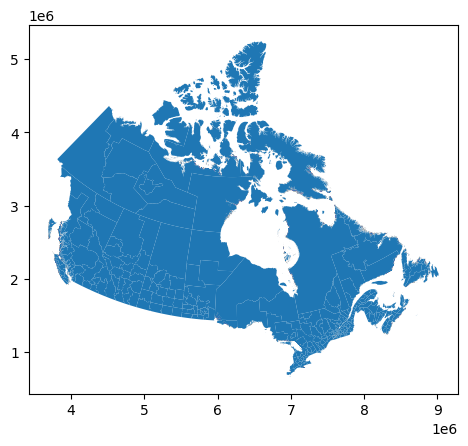

In [5]:
import requests
import zipfile
import io
import geopandas as gpd
import matplotlib.pyplot as plt
import tempfile
import os

# URL of the zip file
url = 'https://www12.statcan.gc.ca/census-recensement/2021/geo/sip-pis/boundary-limites/files-fichiers/lcd_000b21a_e.zip'

# Download the ZIP file
r = requests.get(url)
zip_content = r.content

# Initialize a temporary directory
with tempfile.TemporaryDirectory() as temp_dir:
    # Read the ZIP file into memory
    with zipfile.ZipFile(io.BytesIO(zip_content)) as zip_file:
        # Extract all the contents into the temporary directory
        zip_file.extractall(path=temp_dir)
    
    # Find the shapefile (.shp) among the extracted files
    # This assumes there's only one .shp file in the ZIP
    shp_file = [f for f in os.listdir(temp_dir) if f.endswith('.shp')][0]
    shp_path = os.path.join(temp_dir, shp_file)
    
    # Load the shapefile into a GeoDataFrame
    gdf = gpd.read_file(shp_path)
    
    # Plot the GeoDataFrame
    gdf.plot()
    plt.show()


In [8]:
print(gdf.head())

  CDUID          DGUID           CDNAME CDTYPE    LANDAREA PRUID  \
0  1001  2021A00031001  Division No.  1    CDR   9104.5799    10   
1  1002  2021A00031002  Division No.  2    CDR   5915.5695    10   
2  1003  2021A00031003  Division No.  3    CDR  19272.1069    10   
3  1004  2021A00031004  Division No.  4    CDR   7019.9723    10   
4  1005  2021A00031005  Division No.  5    CDR  10293.7618    10   

                                            geometry  
0  MULTIPOLYGON (((8991051.954 2038839.069, 89910...  
1  MULTIPOLYGON (((8887835.569 2084264.706, 88878...  
2  MULTIPOLYGON (((8666126.603 1955816.189, 86661...  
3  MULTIPOLYGON (((8536466.374 1926979.874, 85364...  
4  MULTIPOLYGON (((8528149.243 2085441.331, 85281...  


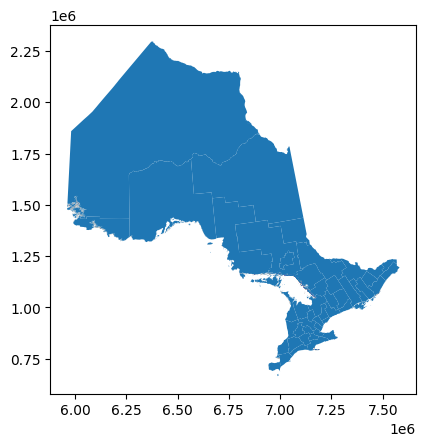

In [6]:
ontario = gdf[gdf['PRUID'] == '35'].copy()

# Plot the map for Ontario
ontario.plot()

# Display the plot
plt.show()

In [7]:


import numpy as np
np.random.seed(42)  # For reproducibility
ontario['Simulated_Data'] = np.random.randint(100, 1000, size=len(ontario))
print(ontario['Simulated_Data'].describe())


count     49.000000
mean     528.367347
std      262.234842
min      120.000000
25%      291.000000
50%      535.000000
75%      763.000000
max      975.000000
Name: Simulated_Data, dtype: float64


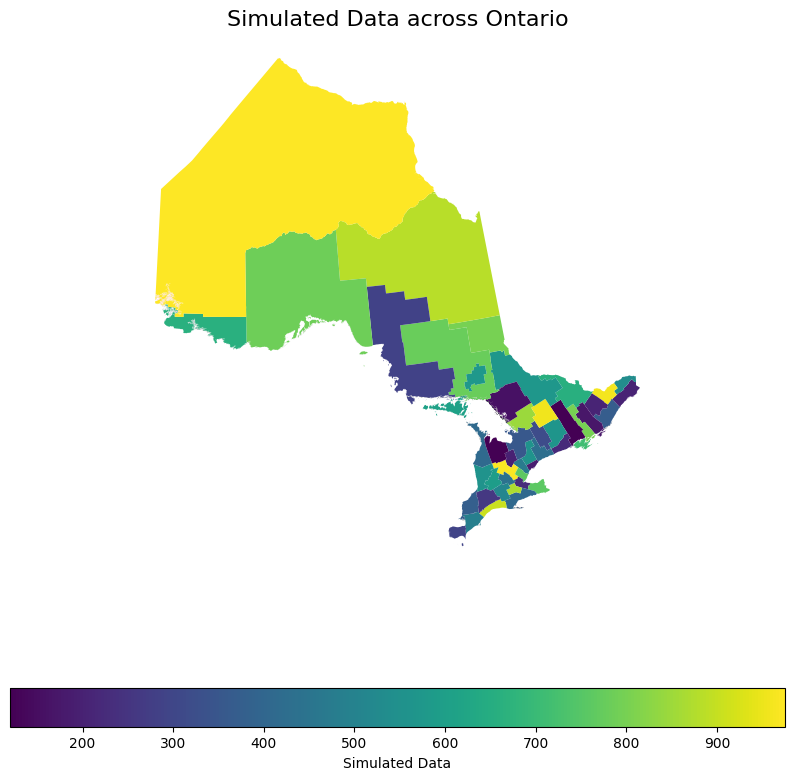

In [8]:

# Assuming 'ontario' is your GeoDataFrame and it includes a column 'Simulated_Data' for plotting

# Set the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the choropleth map
# Adjust the column to your simulated data column name if different
ontario.plot(column='Simulated_Data', ax=ax, legend=True,
             legend_kwds={'label': "Simulated Data", 'orientation': "horizontal"},
             cmap='viridis')  # You can change 'viridis' to any other colormap

# Remove the axis for a cleaner look
ax.axis('off')

# Add a title
ax.set_title('Simulated Data across Ontario', fontdict={'fontsize': '16', 'fontweight' : '3'})

# Show the plot
plt.show()


SyntaxError: invalid syntax (407867815.py, line 3)

In [ ]:
import plotly.express as px

fig = px.choropleth_mapbox(ontario, geojson=ontario.to_json(),
                           locations=ontario.index, color="Simulated_Data",
                           center={"lat": 51.2538, "lon": -85.3232},
                           mapbox_style="carto-positron", zoom=5)

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


